In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [5]:
#load joined data
df = pd.read_csv('data/joined_data.csv')

In [6]:
df.dtypes

brand                             object
name                              object
phone_storage                      int64
scrapeday                         object
price_digitec_CHF                float64
rating_digitec                    object
delivery_time_days_digitec        object
cleaned_phone_name                object
model                             object
storage                          float64
price_mediamarkt_CHF             float64
rating_mediamarkt                float64
delivery_time_days_mediamarkt    float64
dtype: object

In [7]:
df.head()

,brand,name,phone_storage,scrapeday,price_digitec_CHF,rating_digitec,delivery_time_days_digitec,cleaned_phone_name,model,storage,price_mediamarkt_CHF,rating_mediamarkt,delivery_time_days_mediamarkt
0,ASUS,ROG Phone 7,256,af,921.0,3.4,1,ROG Phone 7,ROG Phone 7,256.0,1015.500,4.5000,1.0
1,ASUS,ROG Phone 7,256,bf,909.0,3.4,1,ROG Phone 7,ROG Phone 7,256.0,1012.655,4.5000,5.0
2,ASUS,ROG Phone 7,256,cm,999.0,3.4,1,ROG Phone 7,ROG Phone 7,256.0,1048.460,4.5000,4.0
3,ASUS,ROG Phone 7,512,af,1079.0,4.5,1,ROG Phone 7,ROG Phone 7,512.0,1133.650,4.8269,2.0
4,ASUS,ROG Phone 7,512,bf,999.5,4.5,1,ROG Phone 7,ROG Phone 7,512.0,1156.910,4.8200,4.0


# 1. Frage: Wie stehen die Preise der einzelnen Marken zueinander, bei welchen Marken gibt es die grössten und kleinsten Preisunterschiede?

In [8]:
#aggregate the data
df_agg = df.groupby(['brand'], as_index=False).agg({'price_digitec_CHF': ['mean', 'min', 'max'],
                                                   'price_mediamarkt_CHF': ['mean', 'min', 'max']})

df_agg

brand price_digitec_CHF                          price_mediamarkt_CHF  \
                           mean         min          max                 mean   
0       APPLE        852.019476  168.000000  1539.862500           908.013465   
1        ASUS        868.887843  555.886667  1349.000000          1142.497647   
2   BLACKVIEW        283.066667   74.000000   470.000000           320.578556   
3         CAT        328.500000  222.000000   444.000000           349.875000   
4        DORO        318.000000  318.000000   318.000000           285.270000   
5     EMPORIA        173.000000  173.000000   173.000000           191.120000   
6   FAIRPHONE        628.888889  628.666667   629.000000           669.850000   
7     GIGASET        221.852000  112.000000   261.400000           225.448000   
8      GOOGLE        619.281275  349.000000  1076.193333           668.972343   
9      HAMMER        231.900000  231.900000   231.900000           195.226667   
10      HONOR        407.521944  185.950000   898.500000           440.255556   
11     HUAWEI        687.022304  207.000000  2197.000000           702.678676   
12         LG        130.000000  130.000000   130.000000           303.690000   
13   MOTOROLA        284.281631   85.475000   832.000000           306.730364   
14      NOKIA        215.482432  110.000000   512.500000           224.103784   
15    NOTHING        441.058824  324.000000   602.500000           478.269412   
16     REALME        220.425705   76.700000   416.000000           245.293077   
17    SAMSUNG        631.646926  119.666667  1668.383333           717.981986   
18       SONY        782.793556  392.500000  1025.666667           927.037333   
19    ULEFONE        163.296296  138.000000   192.000000           178.145000   
20     XIAOMI        266.962271   78.750000  1079.000000           294.397992   
21        ZTE        151.217500   54.400000   399.000000           135.982833   

                         
           min      max  
0   464.238333  1583.57  
1   564.390000  1453.37  
2   161.010000   477.73  
3   217.370000   506.65  
4   278.920000   288.62  
5   191.120000   191.12  
6   660.900000   674.74  
7   216.520000   231.66  
8   132.320000  1118.78  
9   186.900000   211.65  
10  229.230000   945.98  
11  193.060000  2006.86  
12  303.690000   303.69  
13   84.120000   849.50  
14   81.900000   536.33  
15  320.520000   602.26  
16   78.210000   541.65  
17  130.060000  1833.10  
18  802.730000  1303.84  
19  132.080000   226.65  
20   72.480000  1446.98  
21   53.060000   244.88

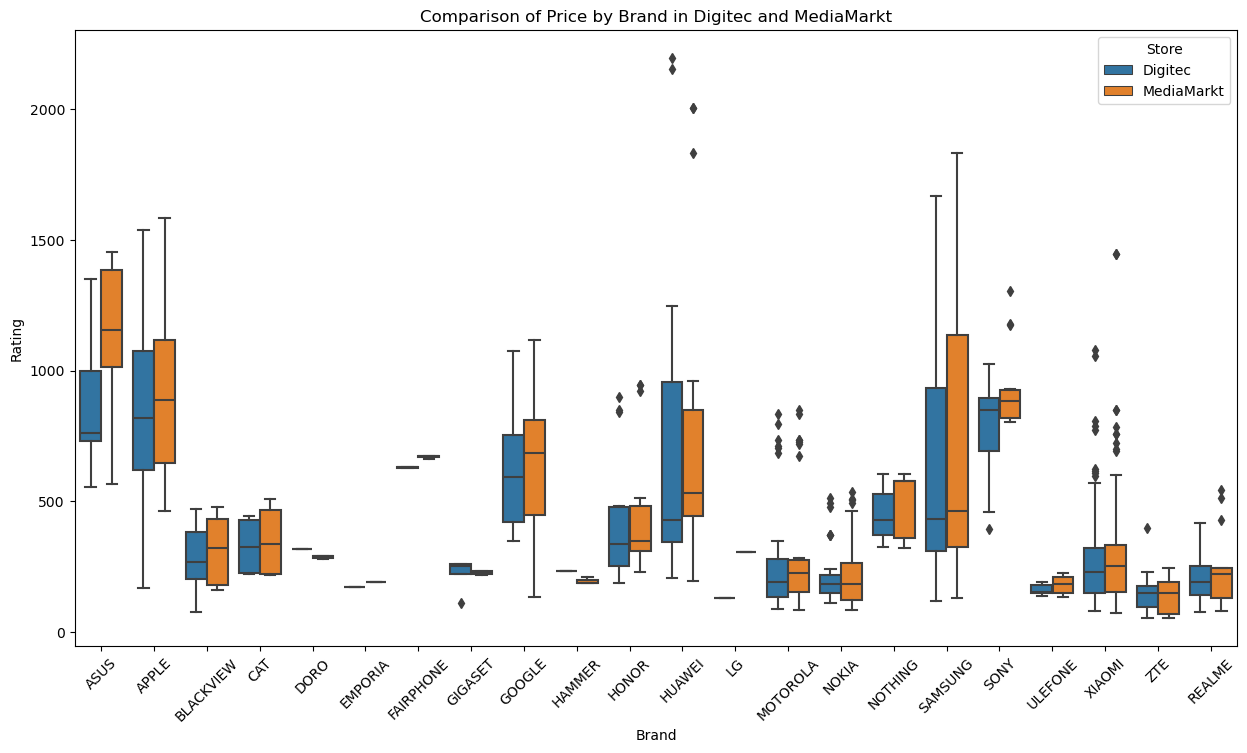

In [43]:
# Melting the DataFrame to get a long format suitable for seaborn boxplot
melted_prices = df.melt(id_vars=['brand'], 
                                value_vars=['price_digitec_CHF', 'price_mediamarkt_CHF'],
                                var_name='Store', 
                                value_name='Price')

# Replacing the column names for better readability in the plot
melted_prices['Store'] = melted_prices['Store'].replace({'price_digitec_CHF': 'Digitec', 'price_mediamarkt_CHF': 'MediaMarkt'})

# Creating the grouped boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(x='brand', y='Price', hue='Store', data=melted_prices)

# Enhancing the plot
plt.title('Comparison of Price by Brand in Digitec and MediaMarkt')
plt.xticks(rotation=45)
plt.xlabel('Brand')
plt.ylabel('Rating')

# Display the plot
plt.show()

# 2. Frage: Wie stehen die Bewertungen der einzelnen Marken zueinander, welche Marken erreichen in welchem Markt bessere Bewertungen?

Note: need to convert/remove 0 star ratings from mediamarkt ratings

In [9]:
#convert rating to numeric
df['rating_digitec'] = pd.to_numeric(df['rating_digitec'], errors='coerce')

### Important Note: need to fix the ratings column/values

In [30]:
df.groupby(['brand'], as_index=False).aggregate(
    rating_digitec_mean=('rating_digitec', 'mean'),
    rating_digitec_min=('rating_digitec', 'min'),
    rating_digitec_max=('rating_digitec', 'max'),
    rating_mediamarkt_mean=('rating_mediamarkt', 'mean'),
    rating_mediamarkt_min=('rating_mediamarkt', 'min'),
    rating_mediamarkt_max=('rating_mediamarkt', 'max')
)

,brand,rating_digitec_mean,rating_digitec_min,rating_digitec_max,rating_mediamarkt_mean,rating_mediamarkt_min,rating_mediamarkt_max
0,APPLE,4.652727,4.2,4.8,4.721285,4.50810,4.9043
1,ASUS,4.288235,3.4,4.6,4.566400,4.40000,4.8269
2,BLACKVIEW,3.991667,3.7,4.3,NaN,NaN,NaN
3,CAT,4.175000,4.1,4.3,4.500000,4.00000,5.0000
4,DORO,NaN,NaN,NaN,NaN,NaN,NaN
5,EMPORIA,NaN,NaN,NaN,NaN,NaN,NaN
6,FAIRPHONE,4.566667,4.5,4.6,5.000000,5.00000,5.0000
7,GIGASET,4.640000,4.1,5.0,4.536900,4.45870,4.6542
8,GOOGLE,4.335294,4.1,4.8,4.408838,3.96785,5.0000
9,HAMMER,NaN,NaN,NaN,NaN,NaN,NaN


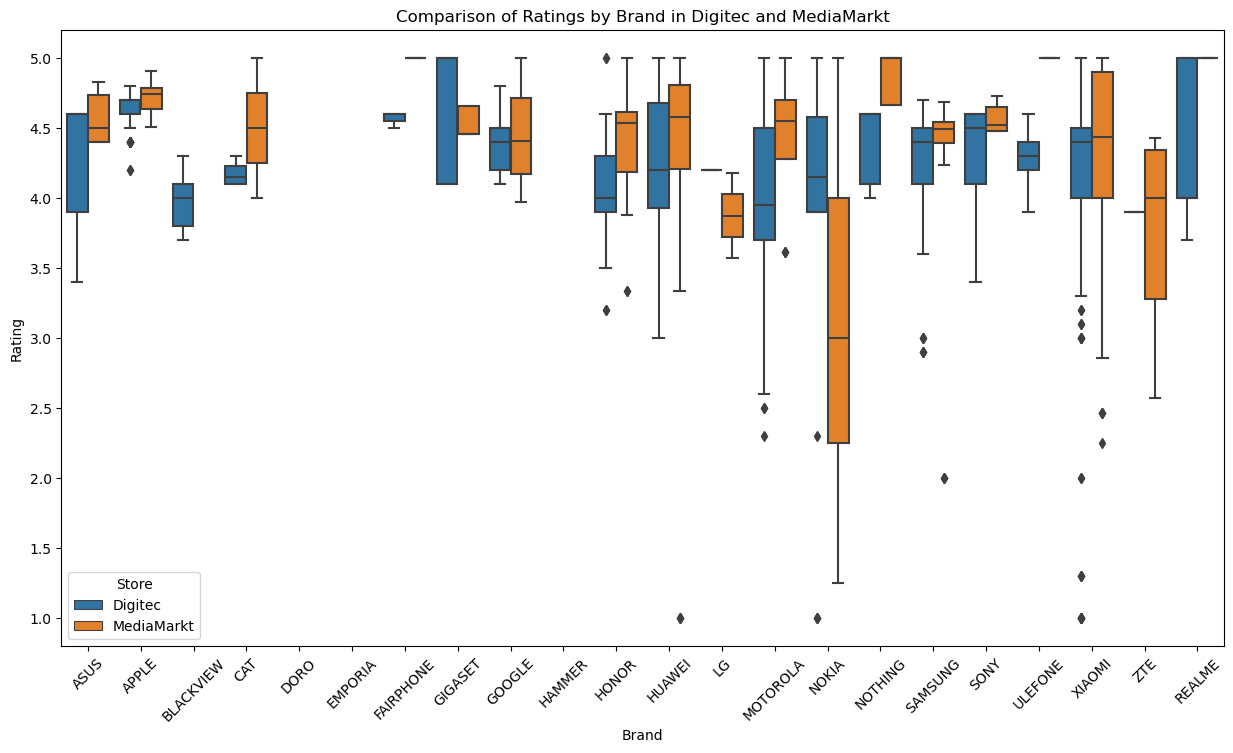

In [37]:
# Converting the rating columns to numeric
df['rating_digitec'] = pd.to_numeric(df['rating_digitec'], errors='coerce')
df['rating_mediamarkt'] = pd.to_numeric(df['rating_mediamarkt'], errors='coerce')

# Melting the DataFrame to get a long format suitable for seaborn boxplot
melted_ratings = df.melt(id_vars=['brand'], 
                                value_vars=['rating_digitec', 'rating_mediamarkt'],
                                var_name='Store', 
                                value_name='Rating')

# Replacing the column names for better readability in the plot
melted_ratings['Store'] = melted_ratings['Store'].replace({'rating_digitec': 'Digitec', 'rating_mediamarkt': 'MediaMarkt'})

# Creating the grouped boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(x='brand', y='Rating', hue='Store', data=melted_ratings)

# Enhancing the plot
plt.title('Comparison of Ratings by Brand in Digitec and MediaMarkt')
plt.xticks(rotation=45)
plt.xlabel('Brand')
plt.ylabel('Rating')

# Display the plot
plt.show()

# 3. Frage: Wie entwickeln sich die Preise während und nach Black Friday?

In [11]:
df

,brand,name,phone_storage,scrapeday,price_digitec_CHF,rating_digitec,delivery_time_days_digitec,cleaned_phone_name,model,storage,price_mediamarkt_CHF,rating_mediamarkt,delivery_time_days_mediamarkt
0,ASUS,ROG Phone 7,256,af,921.0,3.4,1,ROG Phone 7,ROG Phone 7,256.0,1015.500,4.5000,1.0
1,ASUS,ROG Phone 7,256,bf,909.0,3.4,1,ROG Phone 7,ROG Phone 7,256.0,1012.655,4.5000,5.0
2,ASUS,ROG Phone 7,256,cm,999.0,3.4,1,ROG Phone 7,ROG Phone 7,256.0,1048.460,4.5000,4.0
3,ASUS,ROG Phone 7,512,af,1079.0,4.5,1,ROG Phone 7,ROG Phone 7,512.0,1133.650,4.8269,2.0
4,ASUS,ROG Phone 7,512,bf,999.5,4.5,1,ROG Phone 7,ROG Phone 7,512.0,1156.910,4.8200,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,REALME,C30,32,cm,84.4,3.7,5,C30,C30,32.0,79.190,5.0000,1.0
614,REALME,C31,64,cm,142.5,5.0,11,C31,C31,64.0,129.530,NaN,1.0
615,REALME,C35,128,af,191.0,5.0,1,C35,C35,128.0,222.635,5.0000,2.5
616,REALME,C35,128,bf,191.0,5.0,1,C35,C35,128.0,204.085,NaN,4.5


In [19]:
df_scrapeday = df.groupby(['scrapeday', 'brand'], as_index=False).aggregate(
    price_digitec_CHF_mean=('price_digitec_CHF', 'mean'),
    price_digitec_CHF_min=('price_digitec_CHF', 'min'),
    price_digitec_CHF_max=('price_digitec_CHF', 'max'),
    price_mediamarkt_CHF_mean=('price_mediamarkt_CHF', 'mean'),
    price_mediamarkt_CHF_min=('price_mediamarkt_CHF', 'min'),
    price_mediamarkt_CHF_max=('price_mediamarkt_CHF', 'max')
)

df_scrapeday

,scrapeday,brand,price_digitec_CHF_mean,price_digitec_CHF_min,price_digitec_CHF_max,price_mediamarkt_CHF_mean,price_mediamarkt_CHF_min,price_mediamarkt_CHF_max
0,af,APPLE,855.629838,432.000000,1442.725000,892.785667,464.238333,1526.940
1,af,ASUS,822.930667,627.153333,1079.000000,1107.917333,623.216667,1383.610
2,af,BLACKVIEW,351.833333,199.000000,447.500000,351.662778,181.050000,450.175
3,af,CAT,324.000000,224.000000,424.000000,335.600000,217.370000,453.830
4,af,DORO,318.000000,318.000000,318.000000,278.920000,278.920000,278.920
...,...,...,...,...,...,...,...,...
57,cm,SAMSUNG,633.209958,119.666667,1475.560000,714.777417,130.060000,1830.830
58,cm,SONY,820.420000,663.500000,999.000000,922.858000,818.520000,1175.240
59,cm,ULEFONE,163.166667,147.000000,179.333333,186.885000,147.120000,226.650
60,cm,XIAOMI,272.110566,78.750000,1079.000000,311.220531,75.833333,1445.180


In [22]:
df_scrapeday.to_csv('data/df_scrapeday.csv')

### Important: add interactive filter for brand (do not show all brands at once) or only show most popular/well known brands -> need to rework this plot

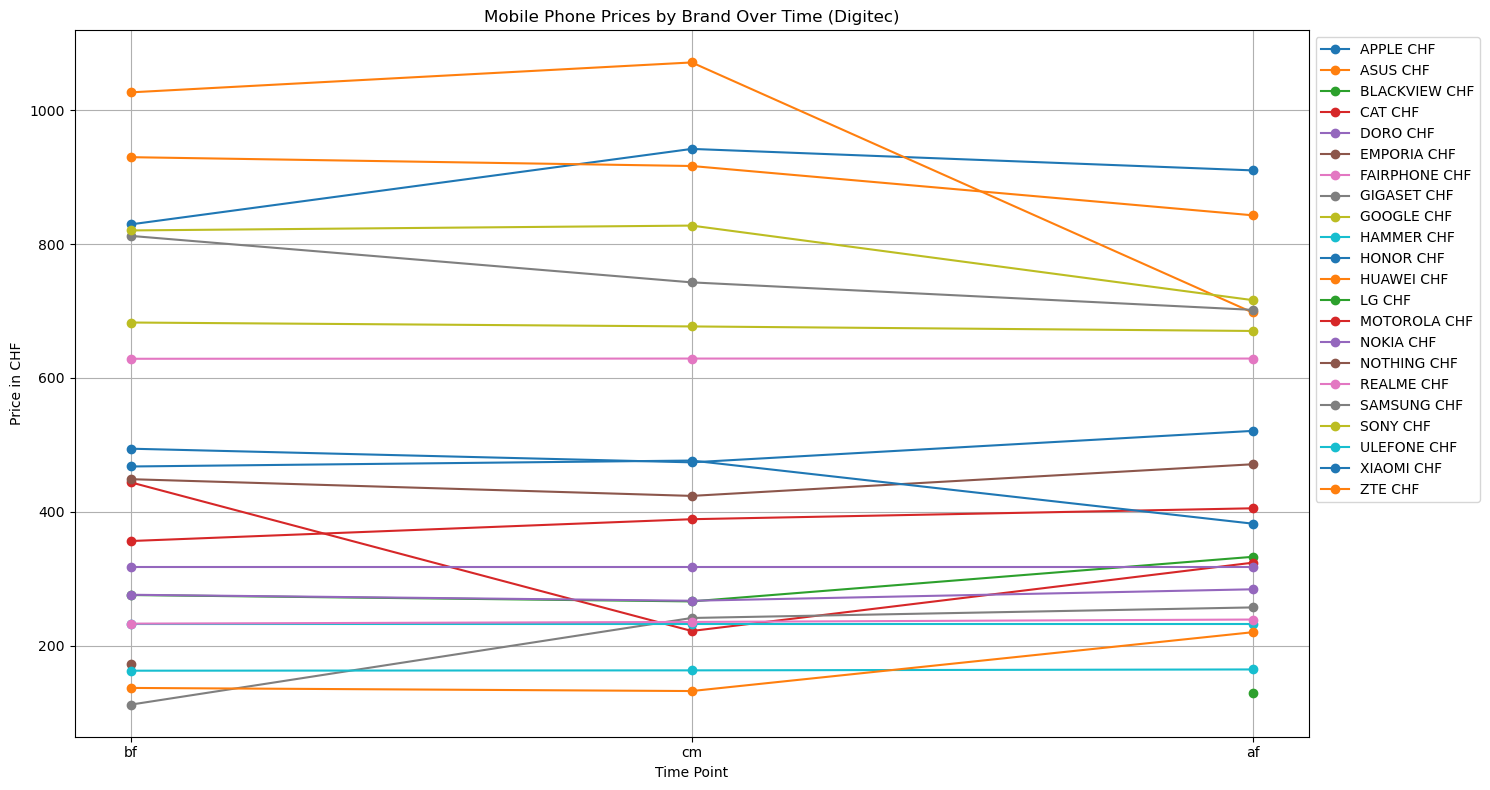

In [41]:
# Melting the DataFrame to long format for easier plotting
melted_df = df_scrapeday.melt(id_vars=['scrapeday', 'brand'], 
                    value_vars=['price_digitec_CHF_mean', 'price_digitec_CHF_min', 'price_digitec_CHF_max'],
                    var_name='Aggregation', 
                    value_name='Price')

# Splitting the aggregation into type (mean, min, max) and source (digitec, mediamarkt)
melted_df[['Aggregation_Type', 'Price_Source']] = melted_df['Aggregation'].str.split('_', expand=True).iloc[:, [2, 1]]

# filtering out digitec data in this plot
melted_df_digitec = melted_df[melted_df['Price_Source'] == 'digitec']

# # Plotting
# plt.figure(figsize=(15, 8))
# 
# # Each brand will be a different line (color)
# for brand in melted_df_digitec['brand'].unique():
#     brand_df = melted_df_digitec[melted_df_digitec['brand'] == brand]
# 
#     # Plotting each aggregation type as a different marker
#     for agg_type in brand_df['Aggregation_Type'].unique():
#         agg_df = brand_df[brand_df['Aggregation_Type'] == agg_type]
#         plt.plot(agg_df['scrapeday'], agg_df['Price'], label=f'{brand} {agg_type}', marker='o')
# 
# # Enhancing the plot
# plt.xlabel('Time Point')
# plt.ylabel('Price in CHF')
# plt.title('Mobile Phone Prices by Brand Over Time (Digitec)')
# plt.legend()
# plt.grid(True)
# 
# # Display the plot
# plt.show()

# Assuming melted_df_digitec is already filtered for digitec data
# Set the desired custom order for scrapeday
custom_order = ['bf', 'cm', 'af']

# Ensure that scrapeday is of type 'category' and set the custom order
melted_df_digitec['scrapeday'] = pd.Categorical(melted_df_digitec['scrapeday'], categories=custom_order, ordered=True)

# Sort the DataFrame according to the custom order and brand for consistency
melted_df_digitec.sort_values(['brand', 'scrapeday'], inplace=True)

# Check for any missing data points which can cause lines to not match up
melted_df_digitec = melted_df_digitec.pivot_table(index='scrapeday', columns='brand', values='Price').reset_index()

# Melt the DataFrame back to long format after filling missing values (if any)
melted_df_digitec = melted_df_digitec.melt(id_vars='scrapeday', var_name='brand', value_name='Price')

# Plotting
plt.figure(figsize=(15, 8))

# Iterate over the brands for plotting
for brand in melted_df_digitec['brand'].unique():
    brand_df = melted_df_digitec[melted_df_digitec['brand'] == brand]

    # Plotting each brand as a line
    plt.plot(brand_df['scrapeday'], brand_df['Price'], label=f'{brand} CHF', marker='o')

# Enhancing the plot
plt.xlabel('Time Point')
plt.ylabel('Price in CHF')
plt.title('Mobile Phone Prices by Brand Over Time (Digitec)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# Display the plot with a tight layout to accommodate the legend
plt.tight_layout()
plt.show()

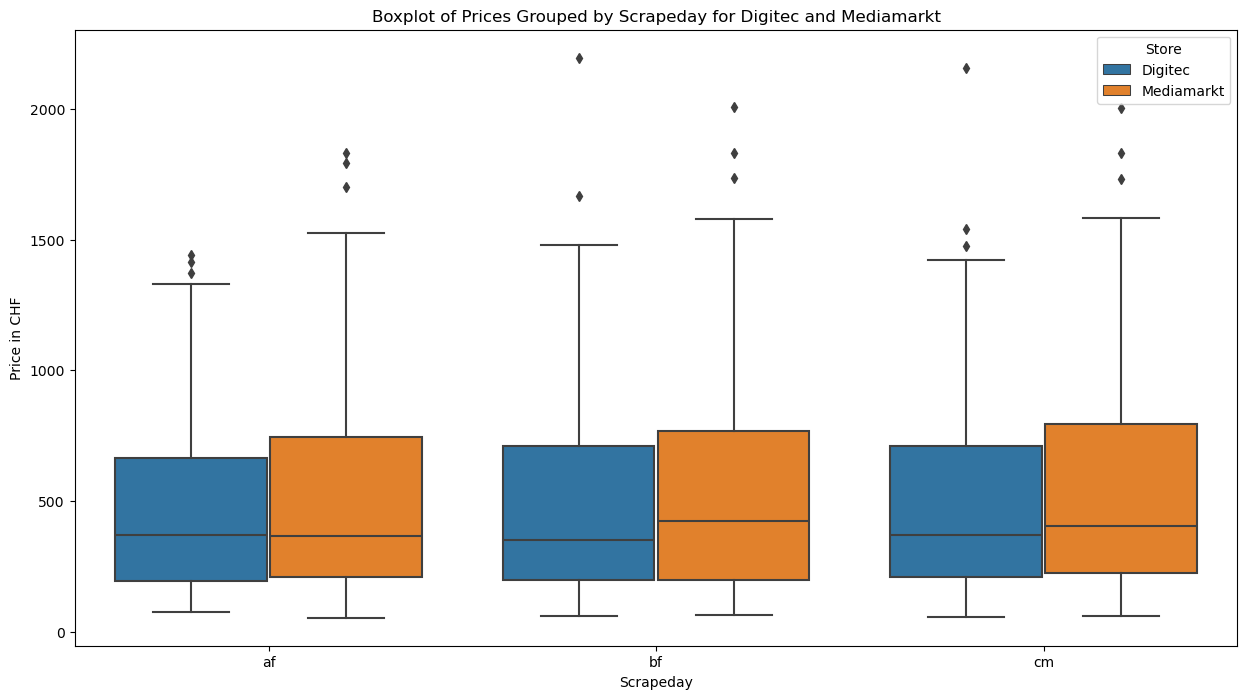

In [66]:
# Ensure that the 'scrapeday' column is recognized as a categorical variable for proper plotting
df['scrapeday'] = pd.Categorical(df['scrapeday'])

melted_data = df.melt(id_vars=['scrapeday'], 
                        value_vars=['price_digitec_CHF', 'price_mediamarkt_CHF'],
                        var_name='Store', 
                        value_name='Price')

# Replace column names for better readability in the plot
melted_data['Store'] = melted_data['Store'].replace({'price_digitec_CHF': 'Digitec', 'price_mediamarkt_CHF': 'Mediamarkt'})

# Create a combined boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(x='scrapeday', y='Price', hue='Store', data=melted_data)
plt.title('Boxplot of Prices Grouped by Scrapeday for Digitec and Mediamarkt')
plt.ylabel('Price in CHF')
plt.xlabel('Scrapeday')
plt.legend(title='Store')

plt.show()

### Aggregate data by brand

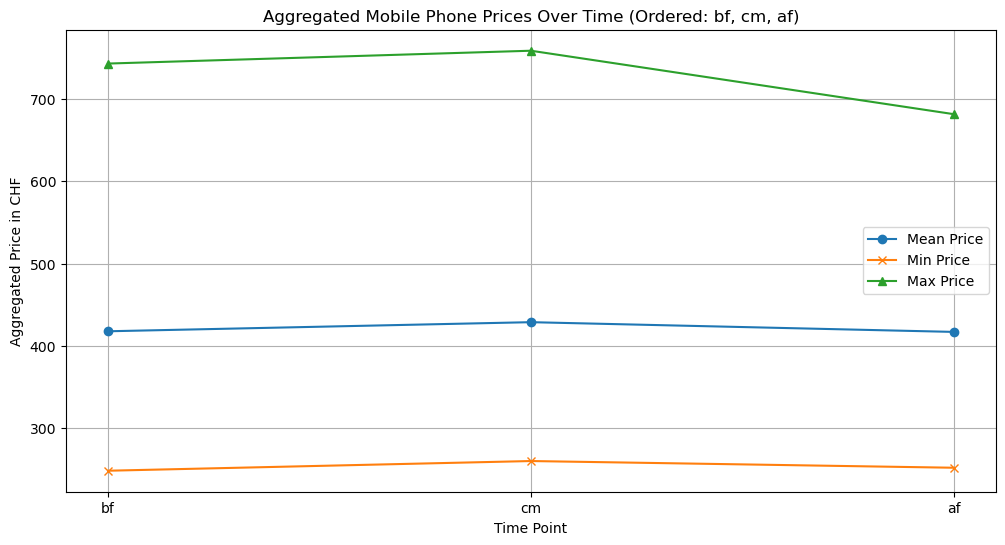

In [29]:
aggregated_data = df_scrapeday.groupby('scrapeday').agg({
    'price_digitec_CHF_mean': 'mean',
    'price_digitec_CHF_min': 'mean',
    'price_digitec_CHF_max': 'mean'
}).reset_index()

# Reordering the time points in the DataFrame as specified: bf, cm, af
time_order = ['bf', 'cm', 'af']
aggregated_data_ordered = aggregated_data.set_index('scrapeday').loc[time_order].reset_index()

# Plotting the reordered data
plt.figure(figsize=(12, 6))

# Plotting mean, min, and max aggregated prices with the new order
plt.plot(aggregated_data_ordered['scrapeday'], aggregated_data_ordered['price_digitec_CHF_mean'], label='Mean Price', marker='o')
plt.plot(aggregated_data_ordered['scrapeday'], aggregated_data_ordered['price_digitec_CHF_min'], label='Min Price', marker='x')
plt.plot(aggregated_data_ordered['scrapeday'], aggregated_data_ordered['price_digitec_CHF_max'], label='Max Price', marker='^')

# Enhancing the plot
plt.xlabel('Time Point')
plt.ylabel('Aggregated Price in CHF')
plt.title('Aggregated Mobile Phone Prices Over Time (Ordered: bf, cm, af)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

### Calculate price difference between time points (for min value)

In [57]:
# Pivot the table
pivot_df = df_scrapeday[["scrapeday", "brand", "price_digitec_CHF_min"]].pivot(index='brand', columns='scrapeday', values='price_digitec_CHF_min')

# Calculate the price difference between the timepoints
pivot_df['BF_to_CM_diff'] = pivot_df['cm'] - pivot_df['bf']
pivot_df['CM_to_1W_diff'] = pivot_df['af'] - pivot_df['cm']
pivot_df['BF_to_1W_diff'] = pivot_df['af'] - pivot_df['bf']

pivot_df

scrapeday,af,bf,cm,BF_to_CM_diff,CM_to_1W_diff,BF_to_1W_diff
brand,,,,,,
APPLE,432.000000,168.000000,428.000000,260.000000,4.000000,264.000000
ASUS,627.153333,555.886667,559.553333,3.666667,67.600000,71.266667
BLACKVIEW,199.000000,80.000000,74.000000,-6.000000,125.000000,119.000000
CAT,224.000000,444.000000,222.000000,-222.000000,2.000000,-220.000000
DORO,318.000000,318.000000,318.000000,0.000000,0.000000,0.000000
EMPORIA,NaN,173.000000,NaN,NaN,NaN,NaN
FAIRPHONE,629.000000,628.666667,629.000000,0.333333,0.000000,0.333333
GIGASET,253.000000,112.000000,221.460000,109.460000,31.540000,141.000000
GOOGLE,355.666667,349.000000,353.500000,4.500000,2.166667,6.666667


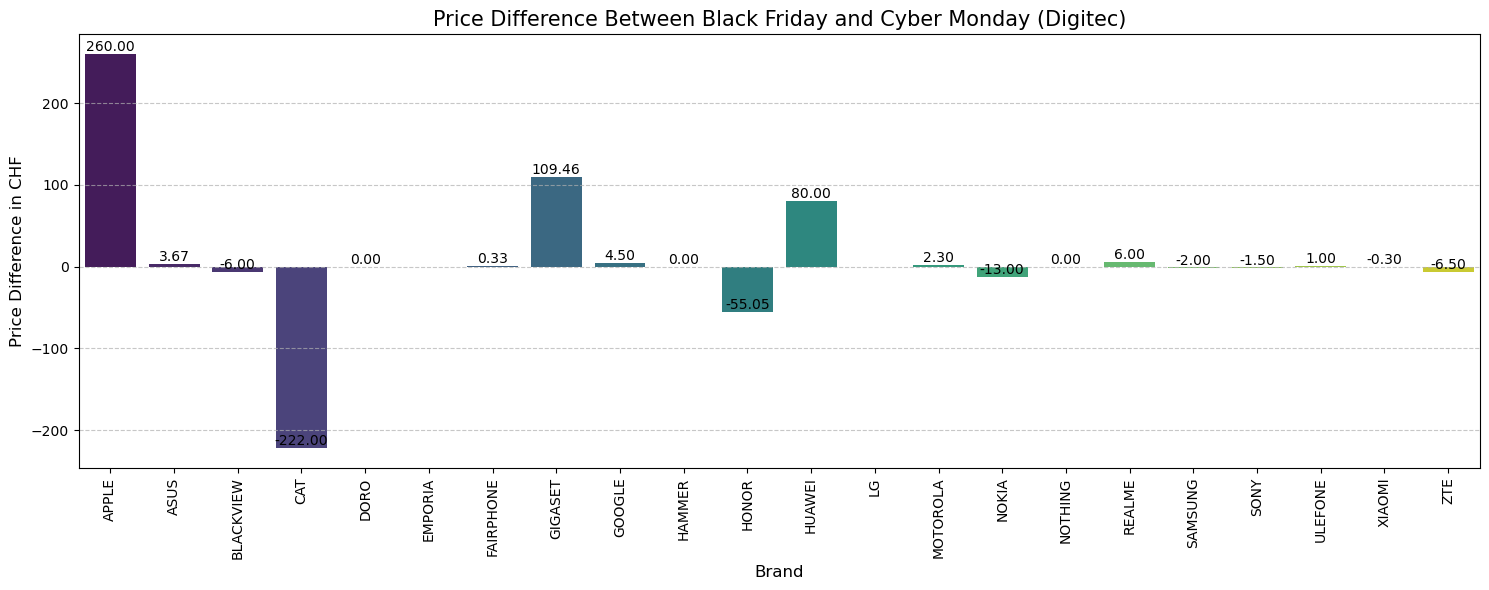

In [68]:
plt.figure(figsize=(15, 6))
barplot = sns.barplot(x=pivot_df.index, y='BF_to_CM_diff', data=pivot_df, palette="viridis")
plt.title('Price Difference Between Black Friday and Cyber Monday (Digitec)', fontsize=15)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Price Difference in CHF', fontsize=12)
plt.xticks(rotation=90)

# Adding value labels
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     fontsize=10, 
                     color='black', 
                     xytext=(0, 5), 
                     textcoords='offset points')

# Adding gridlines and adjusting layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### repeat for mediamarkt and maybe max, mean values

# 4. Frage: Wie unterscheiden sich die Lieferzeiten der beliebtesten Marken?

In [55]:
df["delivery_time_days_digitec"] = pd.to_numeric(df["delivery_time_days_digitec"], errors='coerce')

df.groupby(['brand'], as_index=False).aggregate(
    delivery_digitec_mean=('delivery_time_days_digitec', 'mean'),
    delivery_digitec_min=('delivery_time_days_digitec', 'min'),
    delivery_digitec_max=('delivery_time_days_digitec', 'max'),
    delivery_mediamarkt_mean=('delivery_time_days_mediamarkt', 'mean'),
    delivery_mediamarkt_min=('delivery_time_days_mediamarkt', 'min'),
    delivery_mediamarkt_max=('delivery_time_days_mediamarkt', 'max')
)

,brand,delivery_digitec_mean,delivery_digitec_min,delivery_digitec_max,delivery_mediamarkt_mean,delivery_mediamarkt_min,delivery_mediamarkt_max
0,APPLE,1.660550,1.0,13.0,0.836364,0.0,6.0
1,ASUS,1.411765,1.0,6.0,4.529412,1.0,9.0
2,BLACKVIEW,9.200000,1.0,19.0,4.400000,1.0,9.0
3,CAT,1.000000,1.0,1.0,1.250000,1.0,2.0
4,DORO,1.000000,1.0,1.0,1.333333,1.0,2.0
5,EMPORIA,1.000000,1.0,1.0,1.000000,1.0,1.0
6,FAIRPHONE,1.000000,1.0,1.0,1.333333,1.0,2.0
7,GIGASET,6.400000,1.0,11.0,1.400000,0.0,3.0
8,GOOGLE,1.000000,1.0,1.0,3.338235,0.5,24.0
9,HAMMER,3.666667,2.0,6.0,2.666667,2.0,3.0


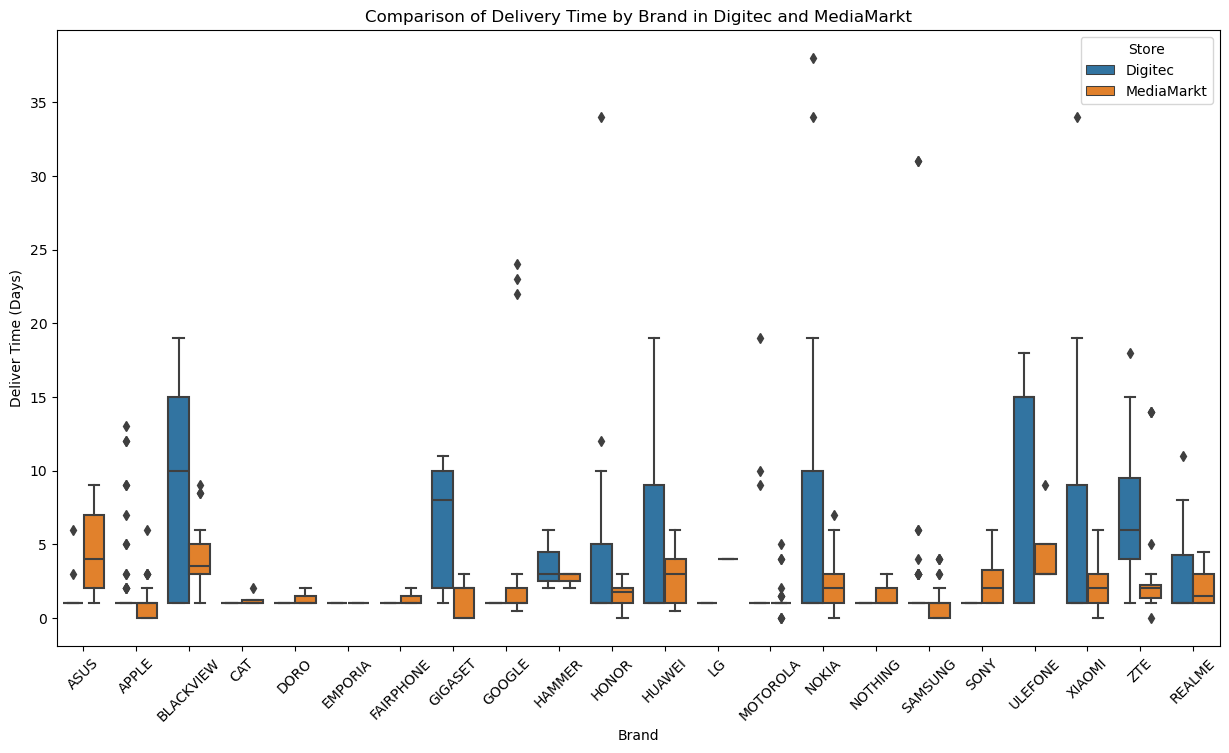

In [56]:
# Melting the DataFrame to get a long format suitable for seaborn boxplot
melted_delivery = df.melt(id_vars=['brand'], 
                                value_vars=['delivery_time_days_digitec', 'delivery_time_days_mediamarkt'],
                                var_name='Store', 
                                value_name='Delivery_Time')

# Replacing the column names for better readability in the plot
melted_delivery['Store'] = melted_delivery['Store'].replace({'delivery_time_days_digitec': 'Digitec', 'delivery_time_days_mediamarkt': 'MediaMarkt'})

# Creating the grouped boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(x='brand', y='Delivery_Time', hue='Store', data=melted_delivery)

# Enhancing the plot
plt.title('Comparison of Delivery Time by Brand in Digitec and MediaMarkt')
plt.xticks(rotation=45)
plt.xlabel('Brand')
plt.ylabel('Deliver Time (Days)')

# Display the plot
plt.show()